In [96]:
import numpy as np
import matplotlib.pyplot as plt
import requests


## Problema#1 shomate

In [97]:
def LeerArchivo(url):
#url=" https://janaf.nist.gov/tables/C-067.txt #como llamarlo dsde un url
    file=requests.get(url)
    datos=file.text
    datos=datos.split("\n")[3:-1]
    mat=[]
    for x in datos:
        s=x.split("\t")
        mat.append([float(a)for a in s])
    mat=np.array(mat)
    return mat

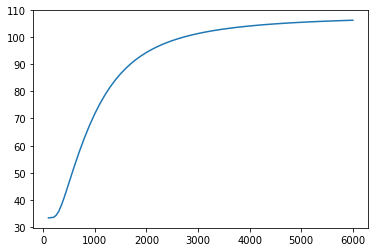

In [98]:
mat=LeerArchivo("https://janaf.nist.gov/tables/C-067.txt")
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()


[ -0.42317857 107.50201452 -41.34537789   5.39384261   0.67123974]


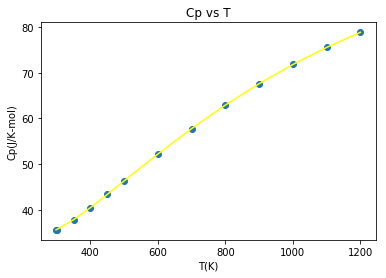

In [99]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)#cuantas filas hay en los datos
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(beta)
Cp_calc=X.dot(beta)
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="yellow")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.title("Cp vs T")
plt.show()

In [100]:
#Calculo de los valores de delta_H delta_S y delta_G
A=-0.42317857
B=107.50201452 
C=-41.34537789
D=5.39384261 
E=0.67123974
deltaH_298=-74.873 #kJ/mol
deltaS_298=186.251 #J/mol
dT=0.001
T=np.arange(298,1200,dT)
t=T/1000
Cp_CH4_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_CH4_gas*dT)+deltaH_298*1000
deltaS_gas=np.cumsum(Cp_CH4_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas



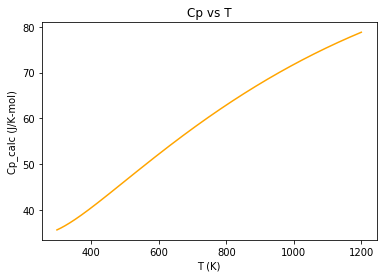

In [101]:
#grafico de Cp_Calc vs T 
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
Cp_calc=X.dot(beta)
plt.plot(T,Cp_calc,color='orange')
plt.xlabel('T (K)')
plt.ylabel('Cp_calc (J/K-mol)')
plt.title('Cp vs T')
plt.show()



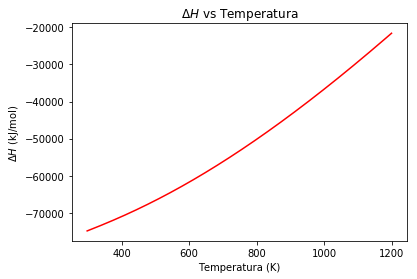

In [102]:
#grafico de deltaH_CH4
plt.plot(T,deltaH_gas,color='red')
plt.xlabel('Temperatura (K)')
plt.ylabel(r'$\Delta  H$ (kJ/mol)')
plt.title(r'$\Delta H$ vs Temperatura')
plt.show()

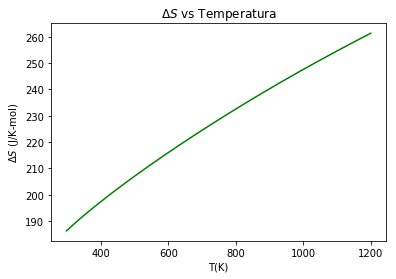

In [103]:
#grafica de entropia delta_S
plt.plot(T,deltaS_gas,color="green")
plt.xlabel("T(K)")
plt.ylabel(r'$\Delta S$ (J/K-mol)')
plt.title(r'$\Delta S$ vs Temperatura')
plt.show()


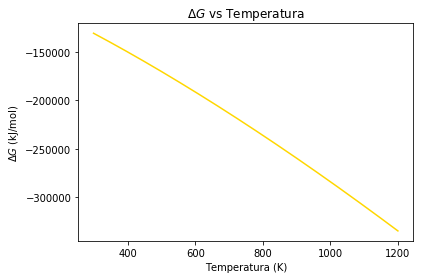

In [104]:
#grafica de delta_G
plt.plot(T,deltaG_gas,color='gold')
plt.xlabel('Temperatura (K)')
plt.ylabel(r'$\Delta G$ (kJ/mol)')
plt.title(r'$\Delta G$ vs Temperatura')
plt.show()

## Problema#2 equilibrio (cambiando la T a 700 K y P a 200 barr)

In [105]:

import numpy as np
import matplotlib.pyplot as plt
import requests

In [106]:
#Calcule la constante de equilibrio para el sistema
deltaS_NO=236.761
deltaH_NO=90.381*1000
deltaS_NO2=275.988
deltaH_NO2=31.878*1000
deltaS_O2=231.466
deltaH_O2=0*1000

T=700  #temperatura en kelvin
pt=200 #presion en barr
R=8.314 #J/K-mol

In [107]:
uNO_est=deltaH_NO-T*deltaS_NO
uNO2_est=deltaH_NO2-T*deltaS_NO2
uO2_est=deltaH_O2-T*deltaS_O2
print(uNO_est,uNO2_est,uO2_est)

-75351.69999999998 -161313.6 -162026.2


In [108]:
x=np.arange(0.001,1,0.001)
nt=3/2-1/2*x
n_NO=1-x
n_NO2=x
n_O2=1/2-1/2*x
X_NO=1-x/nt
X_NO2=x/nt
X_O2=(1/2-1/2*x)/nt

[0.591]


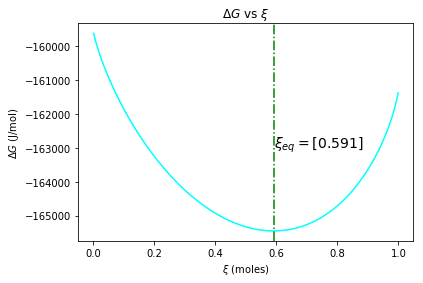

In [109]:
uNO=uNO_est+R*T*np.log(X_NO)
uNO2=uNO2_est+R*T*np.log(X_NO2)
uO2=uO2_est+R*T*np.log(X_O2)
uT=n_NO*uNO+n_NO2*uNO2+n_O2*uO2
#Calculo de minimo
minimo=np.min(uT)
n=np.where(uT==minimo)
xeq=x[n]
print(xeq)
plt.plot(x,uT,color="cyan")
plt.xlabel(r'$\xi$ (moles)')
plt.ylabel(r'$\Delta G$ (J/mol)')
plt.axvline(x=xeq,color='green',linestyle='-.')
plt.text(xeq,-163000,r'$\xi_{eq}=$'+str(xeq), fontsize=14)
plt.title(r'$\Delta G$ vs $\xi$' )
plt.show()

In [110]:
#Calculo de Kp
pNO2=(xeq)/((3/2)-(1/2)*xeq)*pt
pNO=(1-xeq/((3/2)-(1/2)*xeq))*pt
pO2=((1/2)-(1/2)*xeq)/((3/2)-(1/2)*xeq)*pt

Kp=(pNO2)/(pNO*pO2**(1/2))
print(Kp)

[0.16531591]


## Problema #3 secuencia de adn

In [111]:
def secuenciaADN(i):
    a = np.arange(4)
    cad=(np.random.choice(a, i, replace=True))
    sec=str(cad)
    sec1=sec.replace('0','A')
    sec2=sec1.replace('1','T')
    sec3=sec2.replace('2','C')
    sec4=sec3.replace('3','G')
    return(sec4)

In [116]:
x=secuenciaADN(1000)
y=x[1]
print(x)

[T T T A T A C A C T A G T T T T C G G G C A A C T T T T C G C A G G A C T
 G G T C T A C T G T C T T T G T C G A A A A C T C T G T C C A T G T T T C
 C T T A A G T C C C C C T G T A C C G A C C G C T A C C G T C A T C T G G
 G T T C A C G C G A G C G C T T C C G A G A G C G A T C T T C G T C C G C
 C G G G G G G A A C A C A T A C A T C G A C A A T T T G C C C T A A G A A
 C T G C T C A T G A G G C A A A A G A A A C T C A A G C C G A A A T T T G
 C A C G T G G A A T A C T T A C T G G G C G T C C C C C G G C A A G G C A
 A G A T T A T T G C C T G T G A G C T T A T A T T C C C A C C A C C C G A
 G C T T C G T T G C G T A T C A T A G G A A A G T G G C G T A T A G A C A
 T C G C C C G A C C G T T A A C G C T A C G A T C C A G A C A T A A C G T
 C C A T T T C T A T A G C T C T T C G G G G A T T A C G T G T C T C T A G
 A A T A A C T T G T T T C T T C C C A G A A T C G C A A T C T G G A G T T
 C G G C T T A C G T G T A T G G A G C G A G T A G T T A A T A A G T A A C
 G T C A G G G G A G C C 

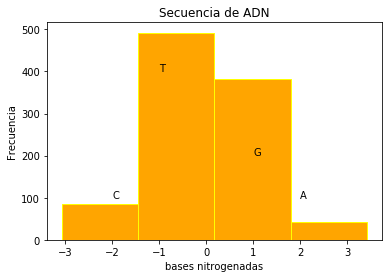

In [117]:
y=np.random.randn(1000)
plt.hist(y,bins=4, facecolor='orange', edgecolor='yellow',density=False)
plt.title('Secuencia de ADN')
plt.xlabel('bases nitrogenadas')
plt.ylabel('Frecuencia')
plt.text(2,100,'A')
plt.text(-2,100,'C')
plt.text(-1,400,'T')
plt.text(1,200,'G')
plt.show()